In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pymongo

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from viewing import *
from util import *

# CONTROL E IMPLEMENTACIÓN DE UNA PUF EN UN MICROPROCESADOR
## Sergio Vinagrero Gutiérrez

In [2]:
# Configuration of the database
client = pymongo.MongoClient("mongodb://localhost:27017/")
database = client['thesis']
db_dumps = database['dumps']

# List of recurring data
boards_ids = list(set(i['board_id'] for i in db_dumps.find({},{"_id": 0, "board_id": 1})))

In [3]:
# Configuration of data frames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

# Configuration of matplotlib and seaborn
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize']= 16
plt.rcParams['axes.titlesize']= 18
plt.rcParams['axes.labelsize']= 18 
plt.rcParams['figure.titlesize']= 18
plt.rcParams['figure.figsize'] = [28, 14]  # Scale up plots

In [4]:
# Cargamos los datos de los parametros de cada placa
extracted_ids_df = pd.read_csv('./boards_params.csv', index_col=None)

In [5]:
dropdown_wafer = widgets.Dropdown(options=create_dropdown_values(extracted_ids_df['Wafer']), 
                                  description='Oblea:')

boards_ids_output = widgets.Output()
summary_boards_out = widgets.Output()

dropdown_boards_eh = generate_simple_eventhandler(boards_ids_output, 
                                                  extracted_ids_df, 'Wafer')

dropdown_wafer.observe(dropdown_boards_eh, names='value')
lista_placas = widgets.VBox([dropdown_wafer, boards_ids_output])

with summary_boards_out:
    print("Numero de placas: " + str(len(extracted_ids_df['Board'].index)))
    print("Numero de obleas: " + str(len(set(extracted_ids_df['Wafer']))))
    print("Numero de lotes : " + str(len(set(extracted_ids_df['Lot']))))

tab_boards_ids = widgets.Tab([lista_placas, summary_boards_out])
tab_boards_ids.set_title(0, 'Lista de placas')
tab_boards_ids.set_title(1, 'Resumen')

display(tab_boards_ids)

In [7]:
final_df = pd.read_csv('./diffs_regions_all_boards.csv', index_col=None)
final_df.sort_values(['Region'], ascending=[True], inplace=True)

region_diffs_mean_df = pd.read_csv('./diffs_regions_all_boards_summary.csv')

In [37]:
dropdown_region = widgets.Dropdown(options=create_dropdown_values(final_df['Region']), 
                                   description='Region:')

regions_output = widgets.Output()
plot_regions_output = widgets.Output()
region_summary_output = widgets.Output()

blue_sns_palette = sns.color_palette("ch:3.5,-.3,dark=1")

with region_summary_output:
    display(region_diffs_mean_df)

def dropdown_region_eh(change):
        regions_output.clear_output()
        plot_regions_output.clear_output()
        
        if (change.new == 'Ninguno'):
            regions_output.clear_output()
            plot_regions_output.clear_output()
            
        elif (change.new == 'Todos'):
            with regions_output:
                display(final_df)
            fig, ax = plt.subplots()
            fig.set_size_inches(28, 180)
            ax = sns.violinplot(y="Region", x="Diff", data=final_df, 
                                inner='point', linewidth=3.0, cut=0.0, 
                                orient='h', scale='count', palette=blue_sns_palette)
            ax.xaxis.set_major_locator(plt.MultipleLocator(5))
            
            with plot_regions_output:
                display(plt.show())

        else:
            data_df = final_df[final_df['Region'] == change.new]
            with regions_output:
                display(data_df)

            fig, ax = plt.subplots()
            ax = sns.violinplot(y="Region", x="Diff", data=data_df,
                                orient='h',cut=0.0,
                                linewidth=4.0, palette=blue_sns_palette)
            ax.xaxis.set_major_locator(plt.MultipleLocator(5))
            
            with plot_regions_output:
                display(plt.show())

            
dropdown_region.observe(dropdown_region_eh, names='value')

tab_regions_all = widgets.Tab([regions_output, plot_regions_output, region_summary_output])
tab_regions_all.set_title(0, 'Diffs de regiones')
tab_regions_all.set_title(1, 'Distribucion')
tab_regions_all.set_title(2, 'Resumen')

display(dropdown_region)
display(tab_regions_all)

Dropdown(description='Region:', options=('Ninguno', 'Todos', '0x20000000', '0x20000200', '0x20000400', '0x2000…

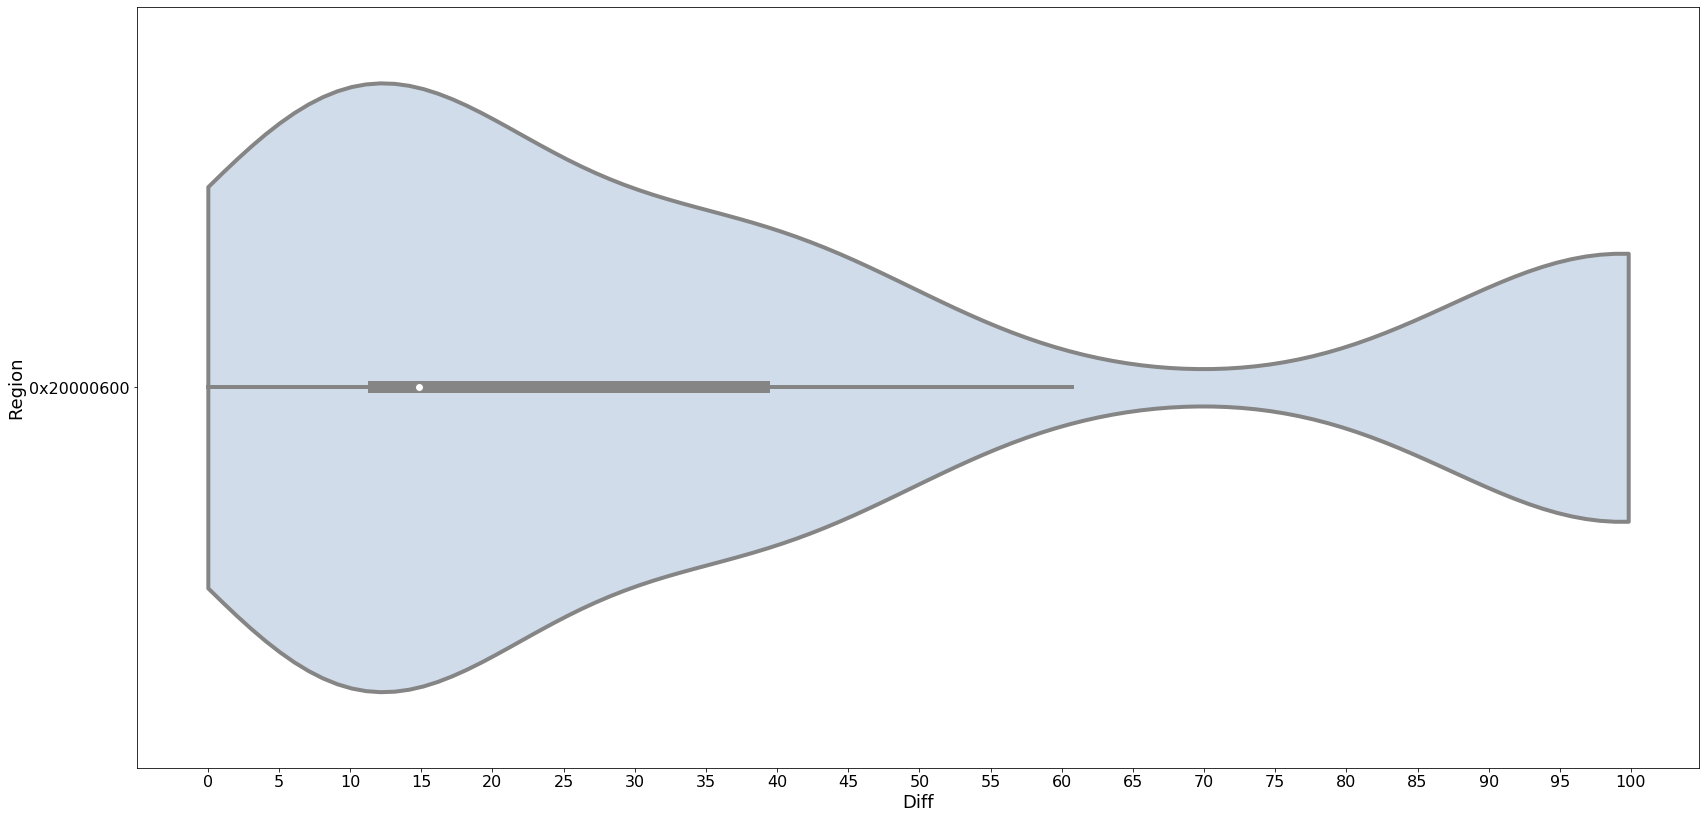

In [35]:
data_df = final_df[final_df['Region'] == '0x20000600']

ax = sns.violinplot(y="Region", x="Diff", data=data_df, cut=0.0, orient='h', scale='area',
                    inner='box', linewidth=4.0, palette=sns.color_palette("ch:3.5,-.3,dark=1"))
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

plt.show()

In [38]:
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show

output_notebook()

Loading BokehJS ...

In [39]:
plot_memory_regions_bokeh(boards_ids[3], 3, 4, show_every=True)
plot_memory_regions_bokeh(boards_ids[2], 3, 4, show_every=True)

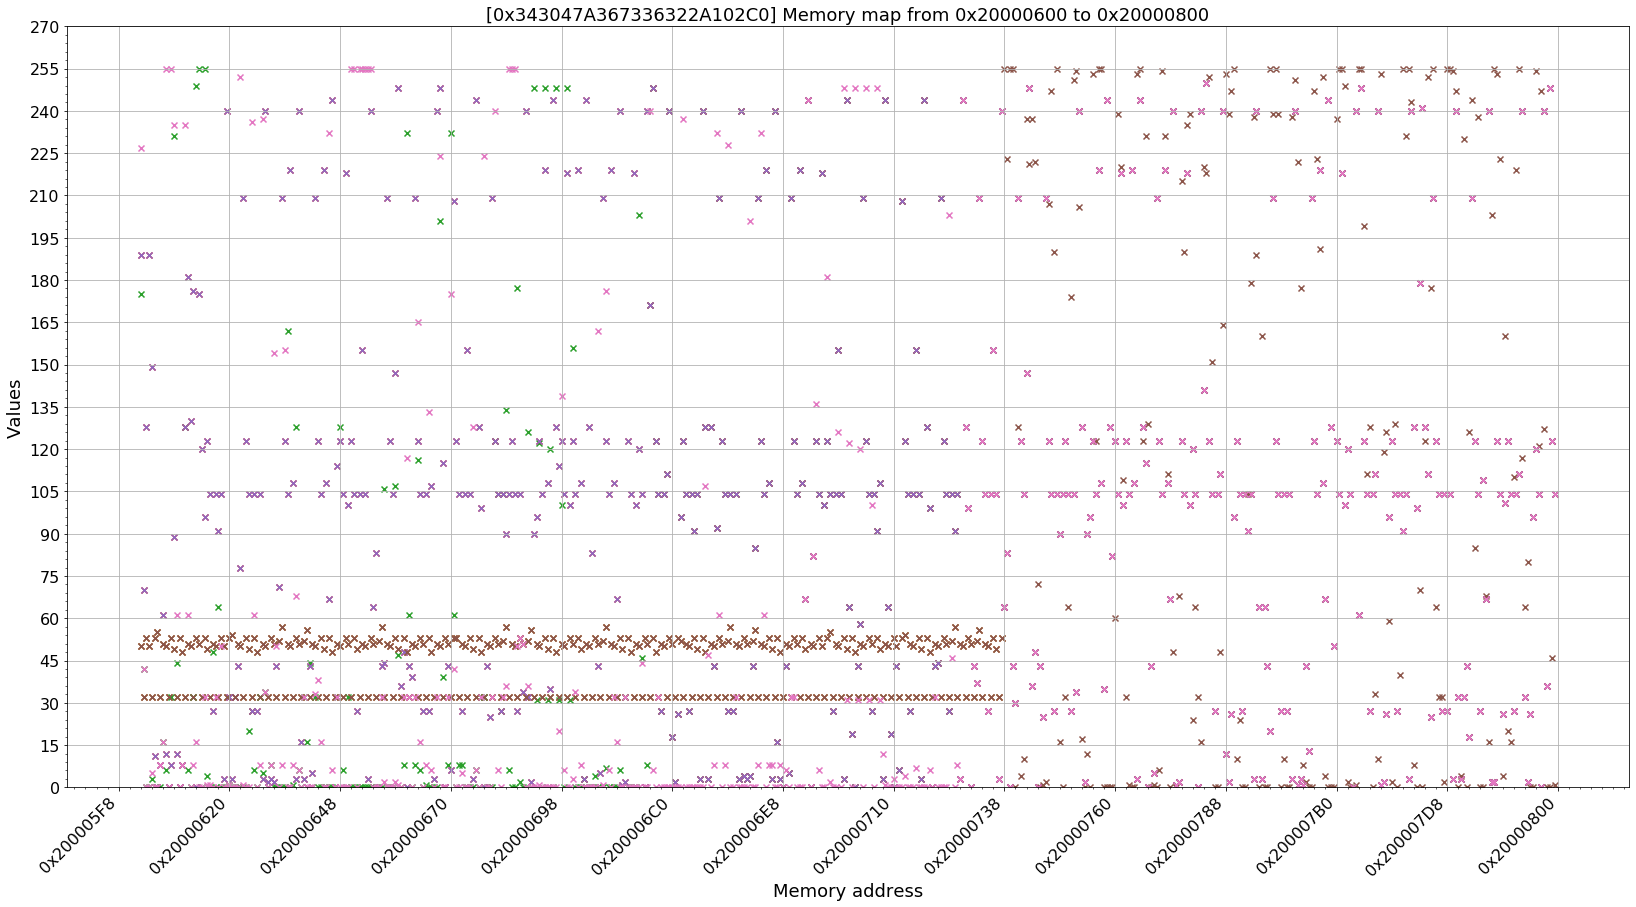

In [40]:
for bid in boards_ids[0:7]:
    plot_memory_regions(bid, 3, 4, show_every=False)

In [ ]:
# TODO: Make a heatmap with the mean and deviation of the memory of a board to show how it changes